# Monte Carlo Integration

Traditional numerical integration techniques like *Newton-Cotes formulas* and
*Gaussian quadrature* usually work well for one-dimensional integrals, but rapidly become inefficient
in higher dimensions. Monte Carlo integration is an integration strategy that has relatively slow
convergence, but that does extremely well in high-dimensional settings compared to other techniques

In [1]:
%matplotlib notebook


import numpy as np
import matplotlib.pyplot as plt

from scipy import linalg as la

### Volume Estimation

Suppose we want to estimate $\pi$ from the area (volume in 2D) of a circle $A = \pi r^2$ of radius 1 (so that $A = \pi$). We do this by randomly choosing points in a domain that encompasses the unit circle. The percentage of points that land within the unit circle approximates the area of the domain that the unit circle occupies. Multiplying this percentage by the total area of the sample domain gives an estimate for the area of the circle. We consider the square domain $\Omega = [-1,1] \times [-1,1]$. The following code samples $n$ number of uniformly distributed random points in $\Omega$, determines what percentage of those points are within the unit circle, then multiplies the percentage by 4 (the area of $\Omega$) to get an estimate for $\pi$.

Since $r = 1$, then the area of the circle is $A_{\text{circle}} = \pi$. We note that the area of the circle is a fraction of the area of the square ($A_{\text{square}} = 4$). The goal is to pick $N$ number of points inside $\Omega$ then $f = \frac{\text{points inside the circe}}{\text{points outside the circe}}$.
    $$A_{\text{circle}} =  A_{\text{square}} \times f \approx \pi$$

In [2]:
# Creates an 2 x num array where the 1st row is the x-coordinate and the 2nd row is the y-coordinate
N = 100000
points = np.random.uniform(-1,1, (2,N)) # points in the 2D domain [-1,1] x [-1,1]

In [3]:
# Determines the length of each point from the center of the circle

lengths = la.norm(points, axis=0)

In [4]:
# Determines how many points are within the circle

num_within = np.count_nonzero(lengths < 1)
num_within

78399

In [5]:
pi_est_MC = 4 * num_within / N # Area of the circle
pi_est_MC

3.13596

In [6]:
np.abs((np.pi - pi_est_MC)/np.pi) * 100 

0.17929293230798118

pretty good estimate!

### Plotting

In [7]:
# Makes a list of tuples (x,y) for plotting

xypts = list(map(lambda x,y:[x,y],points[0],points[1]))

In [8]:
# Determines which points are and aren't inside the circle

inside_circ = []
outside_circ = []

for i in range(0, len(xypts)):
    # Norm of (x,y) < 1 -> inside_circ
    if la.norm(xypts[i]) < 1:
        inside_circ.append(xypts[i])
        
    # Norm of (x,y) >= 1 -> outside_circ
    if la.norm(xypts[i]) >= 1:
        outside_circ.append(xypts[i])
    
# Separates the points into x list and y list
x_val_in = [i[0] for i in inside_circ]
y_val_in = [i[1] for i in inside_circ]

x_val_out = [i[0] for i in outside_circ]
y_val_out = [i[1] for i in outside_circ]

<IPython.core.display.Javascript object>


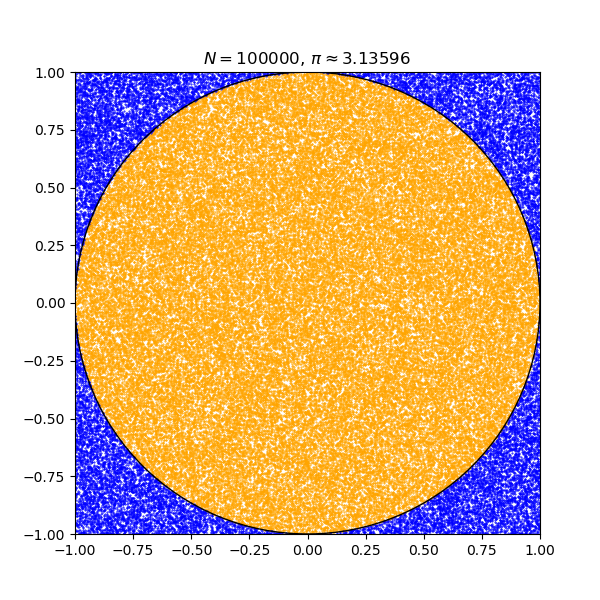

Text(0.5, 1.0, '$N = 100000,\\, \\pi \\approx 3.13596$')

In [9]:
plt.figure(figsize=(6,6))

# Plots the points inside the circle
plt.scatter(x_val_in, y_val_in, color='orange', s=0.2)

# Plots the points outside the circle
plt.scatter(x_val_out, y_val_out, color='blue', s=0.2)

# Plots the circle
plt.gcf().gca().add_artist(plt.Circle((0,0), 1, fill=False))

# Design
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title(r'$N = {},\, \pi \approx {}$'.format(N, pi_est_MC))

# Extending to $n$ dimensions

This time we consider $\Omega = [-1,1] \times [-1,1] \times \ldots \times [-1,1] $. This time we estimate the volume of the open ball
    $$U_n = \left\{ \vec{x} \in \mathbb{R}^n | ||\vec{x}||_2 < 1\right\}$$.
This time the volume of the hypercube is $2^n$. The open ball is contained inside the hypercube so its volume is
    $$V_{\text{hypersphere}} = f \cdot V_{\text{hypercube}}$$

In [10]:
def prob1(n, N = int(10e4)):
    '''
        n: number of dimensions of the domain \Omega
        N: number of points inside the hypercube
        
    Out
        Vol(U_n): Volume of the set of points inside the open ball of radius 1 of dimension n contained inside the hypercube \Omega
    '''
    
    # Volume of the hypercube
    vol_hcube = 2**n
    
    # Generate N number of points inside the hypercube
    points = np.random.uniform(-1,1, (n, int(N)))
    
    # Determines the norm of each point
    lengths = la.norm(points, axis=0)
    
    # Determines the number of points inside the sphere
    num_within = np.count_nonzero(lengths < 1)
    
    return vol_hcube * num_within / N

In [11]:
for i in range(2,10):
    print(prob1(i, N = 10e4))

3.13668
4.17984
4.972
5.19488
5.14752
4.72704
4.15488
3.38432


# Integral estimation

We can estimate $\pi$ using an integral of $f: \mathbb{R}^2 \to \mathbb{R}$ where
    $$f(\vec{x}) = \left\{\begin{array}{ll} 1, & \text{if } ||\vec{x}||_2 < 1 \\0, & \text{otherwise} \end{array}\right.$$
We can reformulate this as a volume integral problem:
    $$\int_{-1}^{1}\int_{-1}^{1} f(x,y)\, dx dy = \int_{\Omega} f(\vec{x})\,dV = \pi$$.
We can estimate the integral by choosing $N$ random points $\left\{\vec{x}_i\right\}_{i=1}^N$ in $\Omega$. Since $f$ indicates whether or not a point lies within the unit circle, the total number of random points that lie in the circle is the sum of the $f(\vec{x}_i)$. Then the average of these values, multiplied by $V_\Omega$, is the desired estimate:
    $$\int_{\Omega} f(\vec{x})\,dV \approx V_{\Omega} \frac 1N \sum_{i=1}^N f(\vec{x}_i) \tag{1}$$
This is called *Monte Carlo Integration* and can be used to estimate the integral of any integrable function $f: \mathbb{R}^n \to \mathbb{R}$ over any domain $\Omega \subset \mathbb{R}^n$.

The intuition behind (1) is that $\frac 1N \sum_{i=1}^N f(\vec{x}_i)$ approximates the average value of $f$ on $\Omega$ and multiplying the volume of $V_\Omega$ yields the approximate integral of $f$ over $\Omega$. In the one dimensional case, we recall the Average Value Theorem
    $$f_{\text{avg}} = \frac{1}{b - a} \int_{a}^b f(x)\,dx$$
So we can use the approximation
    $$f_{\text{avg}} \approx \frac{1}{N} \sum_{i=1}^N f(x_i)$$
Then (1) becomes
    $$\int_a^b f(x)\, dx = (b-a)f_{\text{avg}} \approx  V_{\Omega}\frac{1}{N} \sum_{i=1}^N f(x_i)$$
where $\Omega = [a,b]$, and hence $V_{\Omega} = b - a$.

### Monte Carlo Integration Implementation to 1D functions

In [16]:
def prob2(f, a,b, N=1000000):
    '''
        f: R -> R
        a: lower bound of domain
        b: upper bound of domain
        N: number of points
    '''
    points = np.random.uniform(a, b, N)
    V_omega = b - a
    
    return (V_omega / N) * np.sum([f(i) for i in points]) 

In [17]:
f1 = lambda x: x**2
prob2(f1, -4, 2)

24.037123844791356

In [18]:
f2 = lambda x: np.sin(x)
prob2(f2, -np.pi, np.pi) # Not perfectly zero

-0.0051440440728614395

In [19]:
f3 = lambda x: 1/x
prob2(f3, 1, 10)

2.3042985138747683

In [20]:
f4 = lambda x: np.abs(np.sin(10 * x) * np.cos(10 * x) + np.sqrt(x) * np.sin(3 * x))
prob2(f4, 1, 5)

4.5021677008183065

In [21]:
f5 = lambda x: 1 / x
prob2(f5, 0, 1)

19.15560425828232

In [36]:
f6 = lambda x: np.sin(x) / x
prob2(f6, 0, 10000, N=10000000)

1.6211366718491065

### Generalization to N dimensions

$$\int_{\Omega} f(\vec{x})\,dV \approx V_{\Omega} \frac 1N \sum_{i=1}^N f(\vec{x}_i) \tag{1}$$

In [56]:
def prob3(f, a, b, N=100000):
    '''
        f: R^n -> R
        a: list of lower bounds
        b: list of upper bounds
    '''
    n = len(a)
    
    # Volume of the hyperbox
    V_omega = np.prod([b[i] - a[i] for i in range(0,len(a))])
    
    # Randomly generate points inside the hyperbox
    points = []
    for i in range(0,n):
        points.append(np.random.uniform(0,1, N) * (b[i] - a[i]) + a[i]) # scaling then shifting
    points = np.array(points)
    
    # *[..] unpacks into arguments
    return (V_omega / N) * np.sum([f(*points.T[i]) for i in range(0, N)]) 

In [57]:
a = [0,0]
b = [1,1]
f_1 = lambda x,y: x**2 + y**2

prob3(f_1, a, b)

0.6676860453764798

In [58]:
a = [1,-2]
b = [3,1]
f_2 = lambda x,y: 3*x - 4*y + y**2

prob3(f_2, a, b)

54.096334666522615

In [59]:
a = [-1,-2,-3,-4]
b = [1,2,3,4]
f_3 = lambda x, y, z, w: x + y - w*z**2

prob3(f_3, a, b, N=10000000) # Very innacurate. Supposed to be zero

-2.320098264889502

In [80]:
# Gaussian

def prob4(f, a, b, N=100000):
    '''
        f: R^n -> R
        a: list of lower bounds
        b: list of upper bounds
    '''
    n = len(a)
    
    # Volume of the hyperbox
    V_omega = np.prod([b[i] - a[i] for i in range(0,len(a))])
    
    # Randomly generate points inside the hyperbox
    points = []
    for i in range(0,n):
        points.append(np.random.uniform(0,1, int(N)) * (b[i] - a[i]) + a[i]) # scaling then shifting
    points = np.array(points)
    
    # *[..] unpacks into arguments
    return (V_omega / N) * np.sum([f(points.T[i]) for i in range(0, int(N))]) 

In [81]:
a = [-3/2, 0, 0, 0]
b = [3/4, 1, 1/2, 1]
n= len(a)

def proba4a(x):
    return 1/(2 * np.pi)**(n / 2) * np.exp(-x @ x/ 2)

prob4(proba4a, a, b)

0.015755915518131946

In [82]:
a = [-1,-1,-2]
b = [1,3,1]
n= len(a)

def proba4b(x):
    return 1/(2 * np.pi)**(n / 2) * np.exp(-x @ x/ 2)

prob4(proba4b, a, b)

0.4700199326703944

In [83]:
from scipy import stats

In [84]:
means, cov = np.zeros(3), np.eye(3)
F_bar = stats.mvn.mvnun(a, b, means, cov)[0]

In [89]:
Ns = np.logspace(1, 5, num = 5, endpoint = True)
rel_error = [np.abs((F_bar - prob4(proba4b, a, b, N=i)) / F_bar) for i in Ns]
rel_error

[0.3628729910328531,
 0.0800084705101917,
 0.01703991104242732,
 0.017822889693089174,
 0.00207162239066883]

<IPython.core.display.Javascript object>


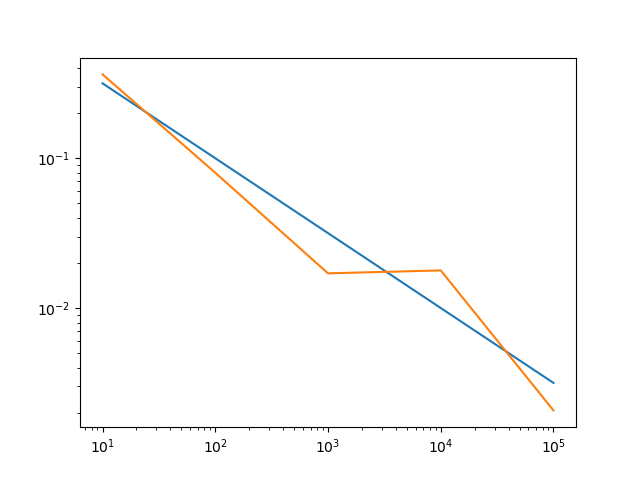

In [90]:
plt.figure()

plt.loglog(Ns, 1 / np.sqrt(Ns))
plt.loglog(Ns, rel_error)